Deep Learning midterm project
Karol Zając

Problem
By observing certain characteristics of a mushroom, it is possible to
determine whether it is poisonous or fit for human consumption. Based
on information regarding a mushroom’s physical characteristics, this
model will attempt to predict whether a mushroom is edible or poisonous

In order to train and test the model a dataset titled "Mushroom
Classification" was chosen
(https://www.kaggle.com/datasets/uciml/mushroom-
classification/data).

In [64]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from keras.callbacks import EarlyStopping
from sklearn import metrics

pd.set_option("display.max_columns", None)


def print_unique_col_values(df):
    for column in df:
        print(f'{column} : {df[column].unique()}')

In [2]:
df=pd.read_csv("mushrooms.csv")

In [3]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


Attribute Information: (classes: edible=e, poisonous=p)

    cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

    cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

    cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

    bruises: bruises=t,no=f

    odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

    gill-attachment: attached=a,descending=d,free=f,notched=n

    gill-spacing: close=c,crowded=w,distant=d

    gill-size: broad=b,narrow=n

    gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

    stalk-shape: enlarging=e,tapering=t

    stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

    stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

    stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

    stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

    stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

    veil-type: partial=p,universal=u

    veil-color: brown=n,orange=o,white=w,yellow=y

    ring-number: none=n,one=o,two=t

    ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

    spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

    population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

    habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


In [4]:
df[df.isna().any(axis=1)] #check for missing data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
print_unique_col_values(df)

class : ['p' 'e']
cap-shape : ['x' 'b' 's' 'f' 'k' 'c']
cap-surface : ['s' 'y' 'f' 'g']
cap-color : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises : ['t' 'f']
odor : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment : ['f' 'a']
gill-spacing : ['c' 'w']
gill-size : ['n' 'b']
gill-color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape : ['e' 't']
stalk-root : ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring : ['s' 'f' 'k' 'y']
stalk-surface-below-ring : ['s' 'f' 'y' 'k']
stalk-color-above-ring : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type : ['p']
veil-color : ['w' 'n' 'o' 'y']
ring-number : ['o' 't' 'n']
ring-type : ['p' 'e' 'l' 'f' 'n']
spore-print-color : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population : ['s' 'n' 'a' 'v' 'y' 'c']
habitat : ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [7]:
class_dict={'p':1,'e':0}
stalk_surface_dict={'s':0,'f':1,'k':2,'y':3}
stalk_color_dict={'w':0, 'g':1, 'p':2, 'n':3, 'b':4, 'e':5, 'o':6, 'c':7, 'y':8}

In [8]:
le=LabelEncoder()

df2=df.copy() #Convert data to numerical values
for col in df.columns:
    df2[col]=le.fit_transform(df[col])
df2["class"]=df["class"].replace(class_dict)
df2["stalk-surface-above-ring"]=df["stalk-surface-above-ring"].replace(stalk_surface_dict)
df2["stalk-surface-below-ring"]=df["stalk-surface-below-ring"].replace(stalk_surface_dict)
df2["stalk-color-above-ring"]=df["stalk-color-above-ring"].replace(stalk_color_dict)
df2["stalk-color-below-ring"]=df["stalk-color-below-ring"].replace(stalk_color_dict)

C:\Users\karol\AppData\Local\Temp\ipykernel_3232\945739859.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2["class"]=df["class"].replace(class_dict)
C:\Users\karol\AppData\Local\Temp\ipykernel_3232\945739859.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2["stalk-surface-above-ring"]=df["stalk-surface-above-ring"].replace(stalk_surface_dict)
C:\Users\karol\AppData\Local\Temp\ipykernel_3232\945739859.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain

In [9]:
df2

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,0,0,0,0,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,0,0,0,0,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,0,0,0,0,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,0,0,0,0,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,0,0,0,0,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,0,0,6,6,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,0,0,6,6,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,0,0,6,6,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,0,2,0,0,0,2,1,0,7,4,2


In [10]:
df2.drop("veil-type",axis='columns',inplace=True) #Drop veil type as it only has 1 possible value

In [11]:
df2.corr() #check feature correlation

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,-0.102019,-0.379361,0.552044,0.443754,0.225294,0.223969,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,0.030191,0.009404,0.013931,-0.015670,-0.022620,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,-0.126245,-0.011338,0.067228,0.015720,0.008820,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,0.321274,0.087203,0.142325,-0.033825,-0.031229,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,0.244188,-0.573538,-0.456886,-0.267325,-0.282574,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,-0.205215,-0.163362,-0.237920,-0.103898,-0.091709,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,0.144063,0.087714,0.080992,-0.514289,-0.499585,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,0.350548,-0.054077,-0.088013,-0.309026,-0.283264,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,-0.344345,0.052806,0.012517,-0.186706,-0.145952,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,0.315080,-0.324450,-0.231265,-0.024503,0.012169,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


<Axes: >

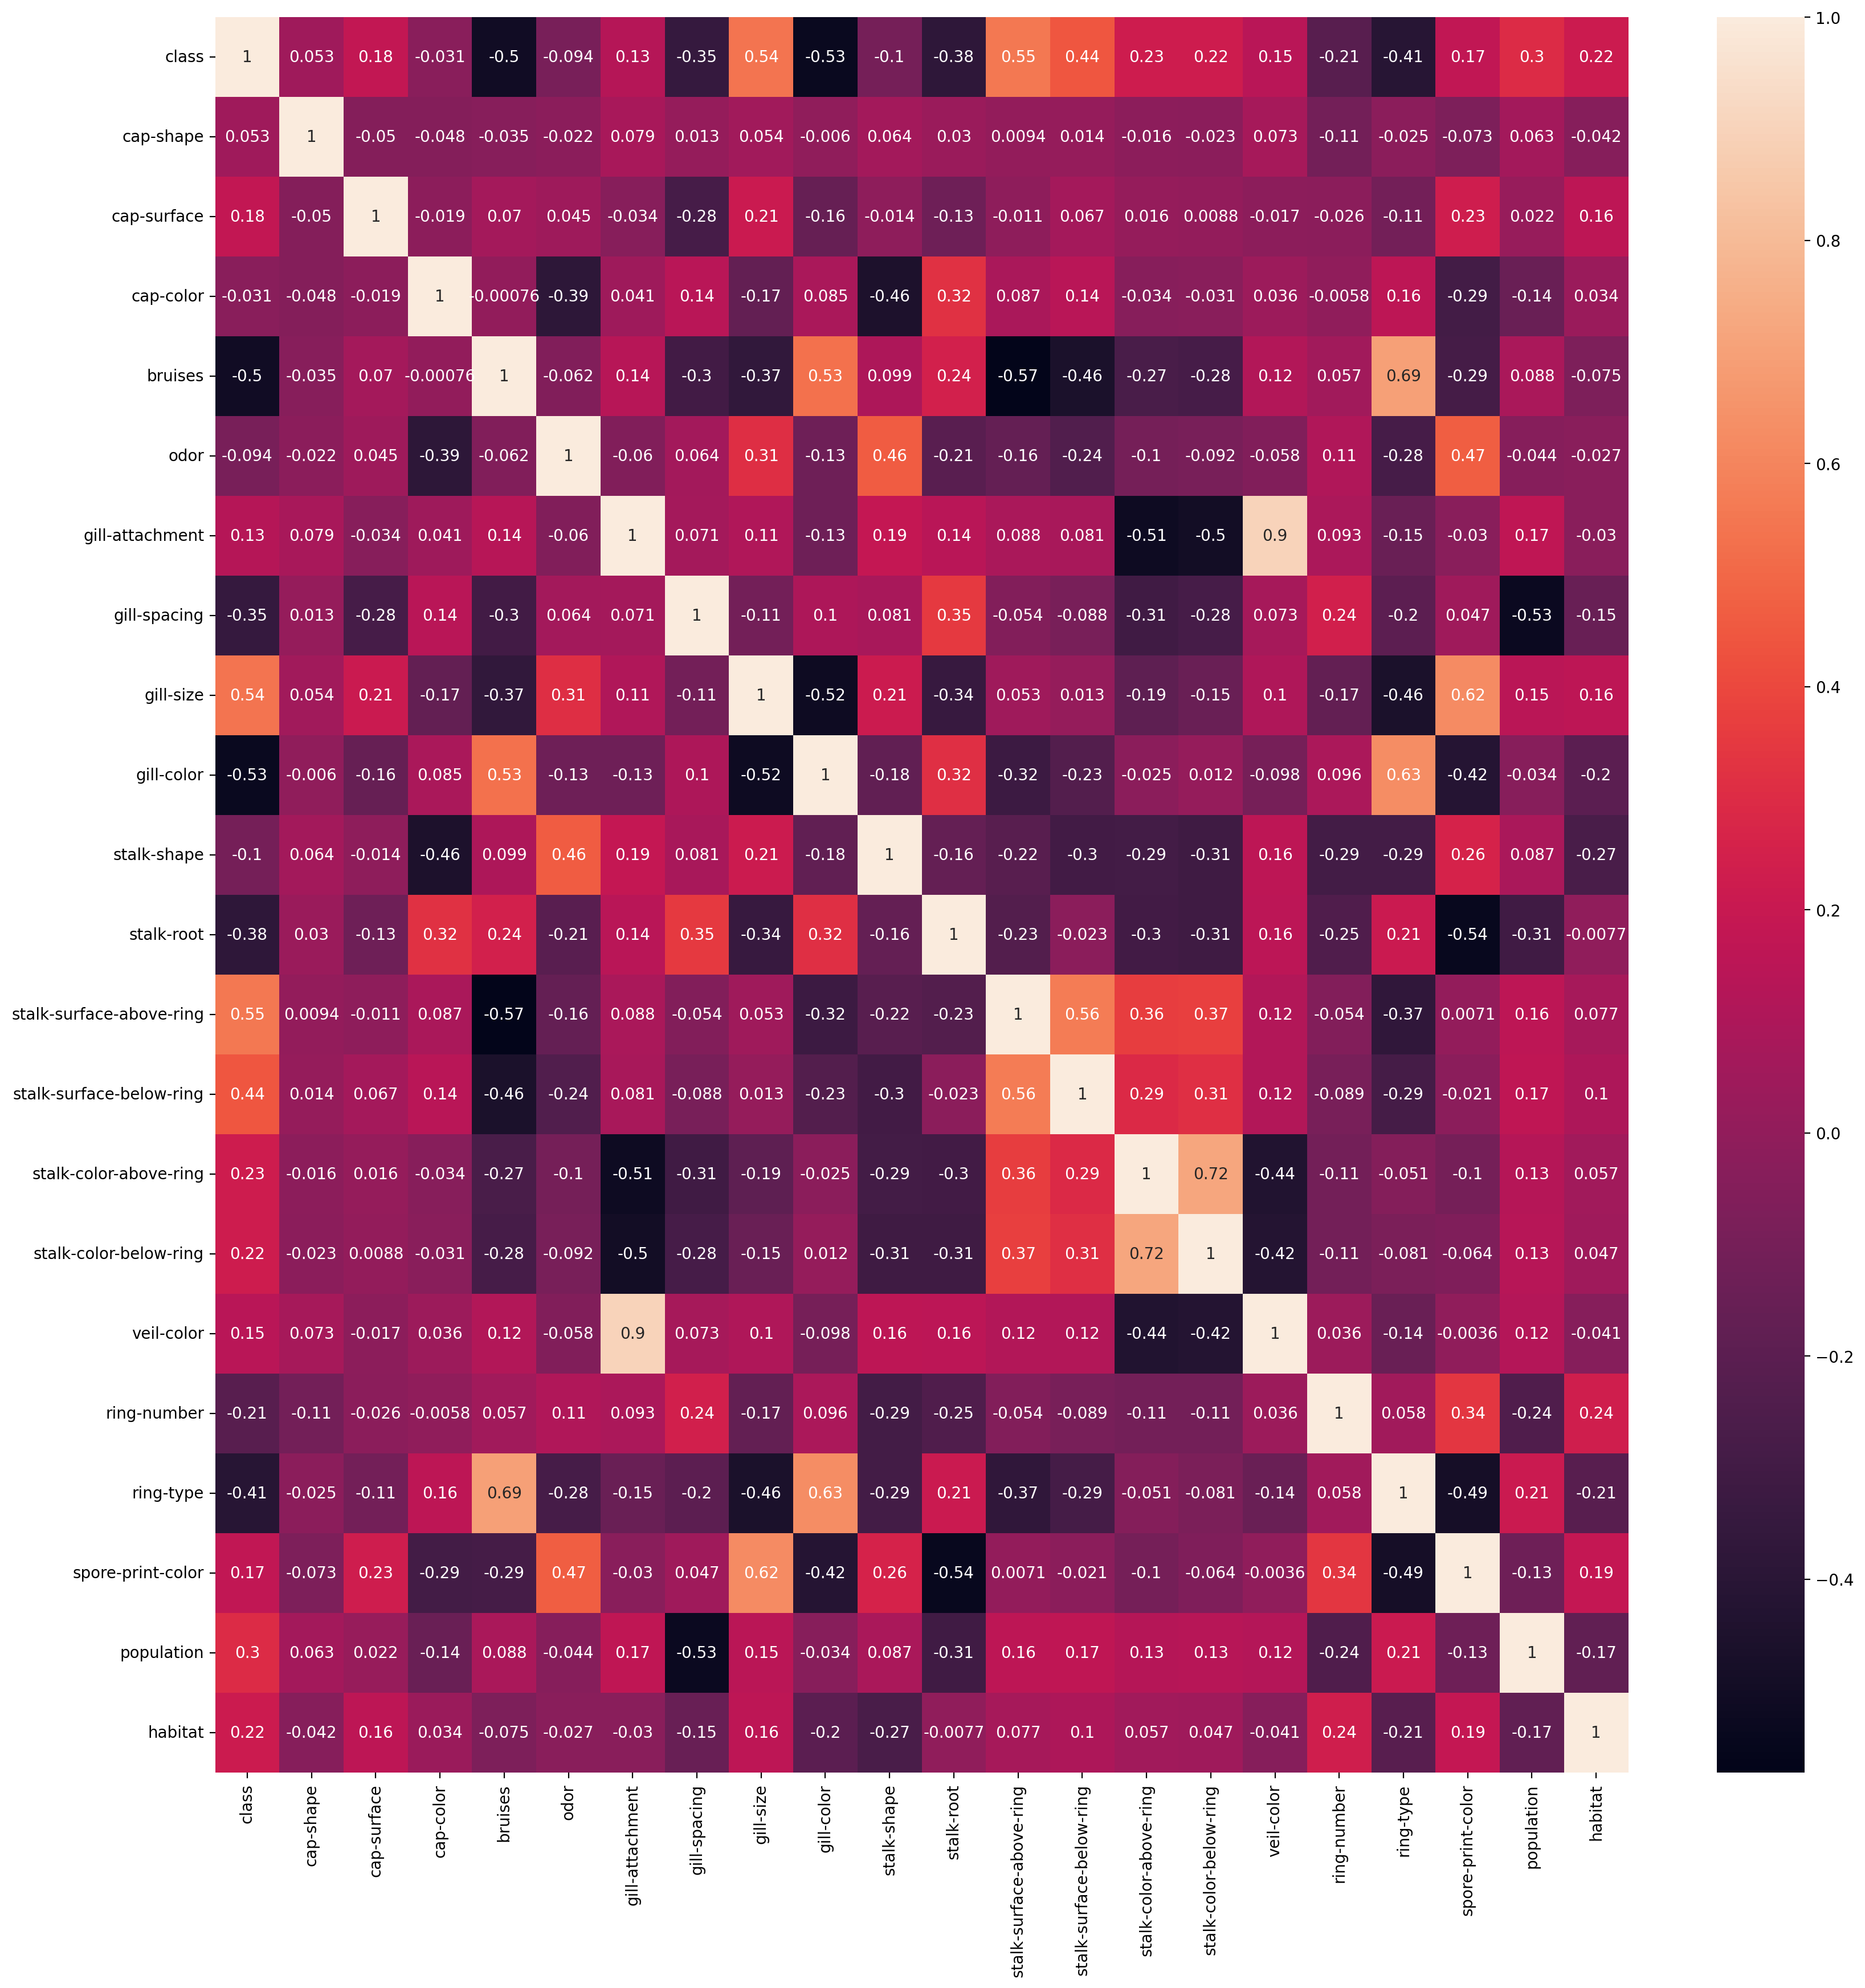

In [12]:
plt.figure(figsize=(20,20),dpi=200)
sns.heatmap(df2.corr(),annot=True)

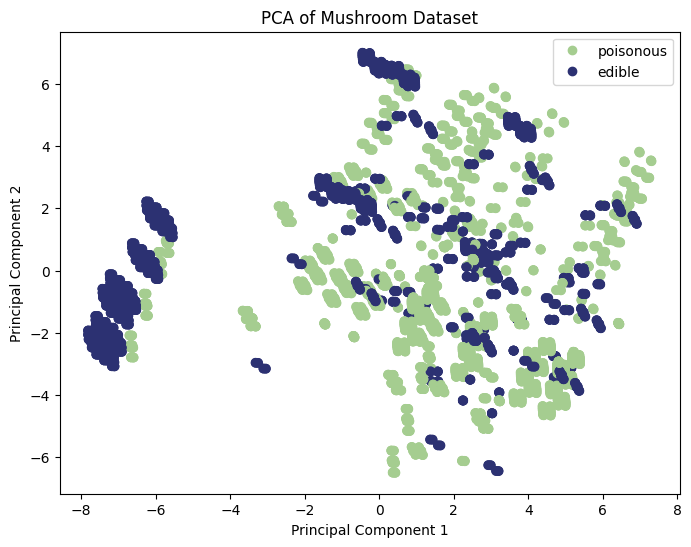

In [13]:
X=df2.drop("class", axis='columns')
y=df2["class"]
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plot=plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="crest")
plt.legend(handles=plot.legend_elements()[0], labels=list(["poisonous","edible"]))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Mushroom Dataset')
plt.show()

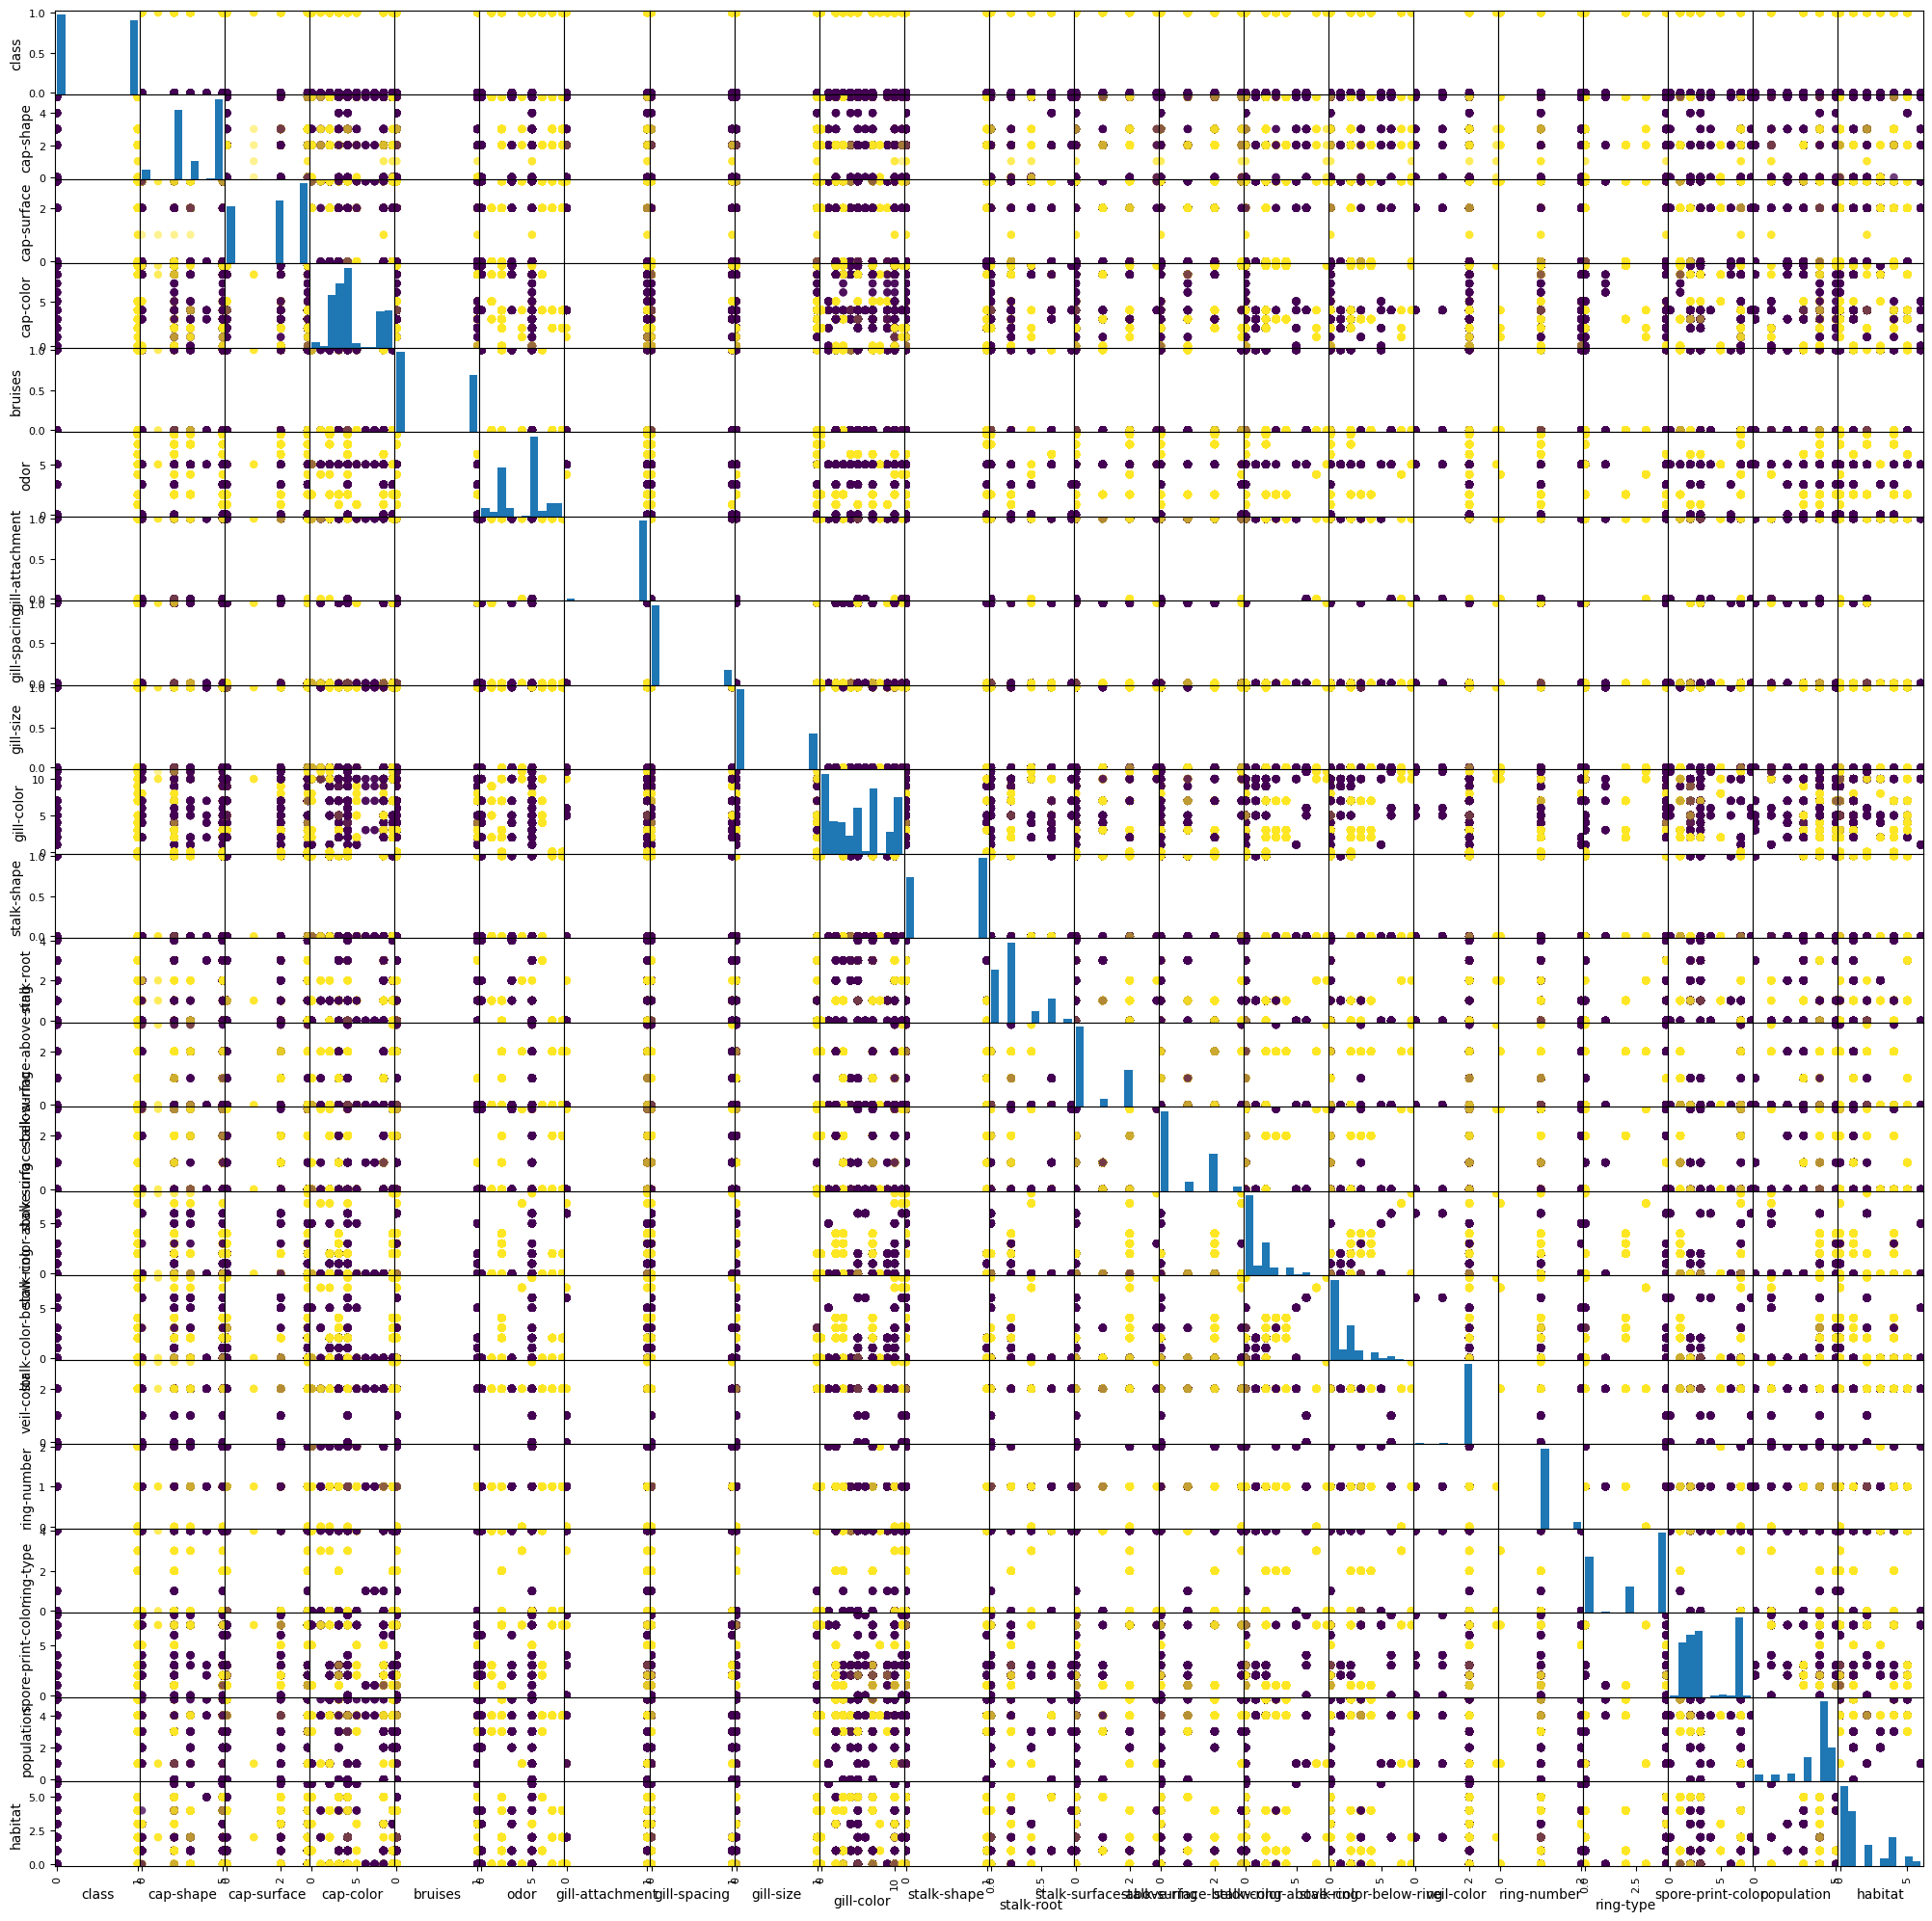

In [14]:
grr = pd.plotting.scatter_matrix(df2, c=y, figsize=(25, 25), marker='o', hist_kwds={'bins': 10})

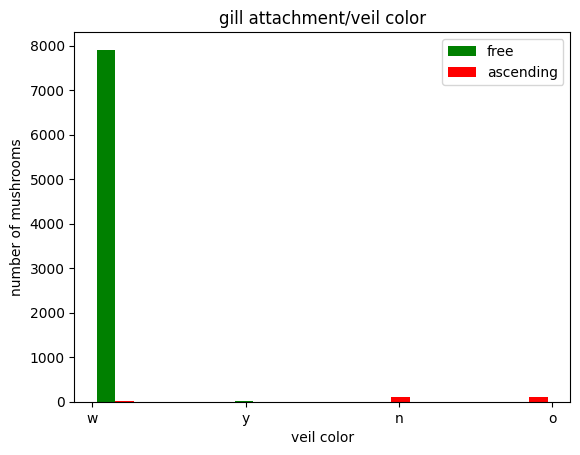

In [15]:
free=df[df["gill-attachment"]=='f']["veil-color"]
ascending=df[df["gill-attachment"]=='a']["veil-color"]

plt.hist([free,ascending],color=['green','red'],label=['free','ascending'])
plt.xlabel("veil color")
plt.ylabel("number of mushrooms")
plt.title("gill attachment/veil color")
plt.legend()

In [16]:
df3=df2.drop("gill-attachment",axis='columns')
#gill attachment and veil color are highly correlated with correlation coefficient being 0.9
#therefore we can drop the gill attachment column to simplify the model without 
#losing much information

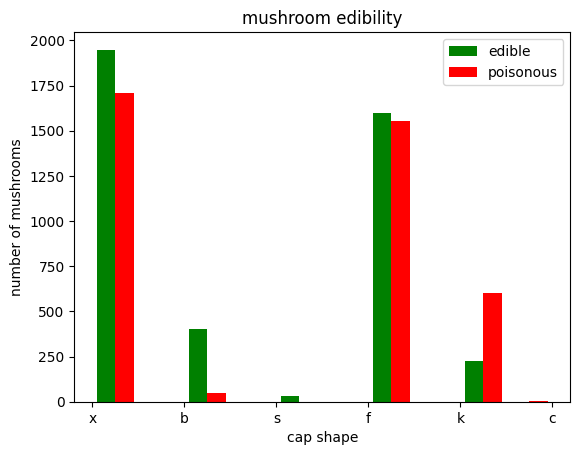

In [17]:
x_plot=df[df["class"]=='e']["cap-shape"]
y_plot=df[df["class"]=='p']["cap-shape"]

plt.hist([x_plot,y_plot],color=['green','red'],label=['edible','poisonous'])
plt.xlabel("cap shape")
plt.ylabel("number of mushrooms")
plt.title("mushroom edibility")
plt.legend()

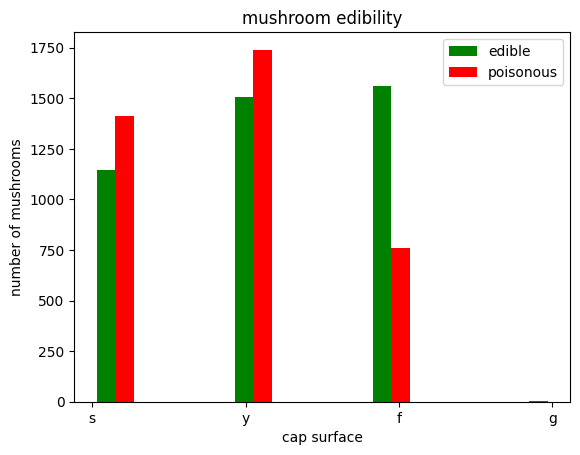

In [18]:
x_plot=df[df["class"]=='e']["cap-surface"]
y_plot=df[df["class"]=='p']["cap-surface"]

plt.hist([x_plot,y_plot],color=['green','red'],label=['edible','poisonous'])
plt.xlabel("cap surface")
plt.ylabel("number of mushrooms")
plt.title("mushroom edibility")
plt.legend()

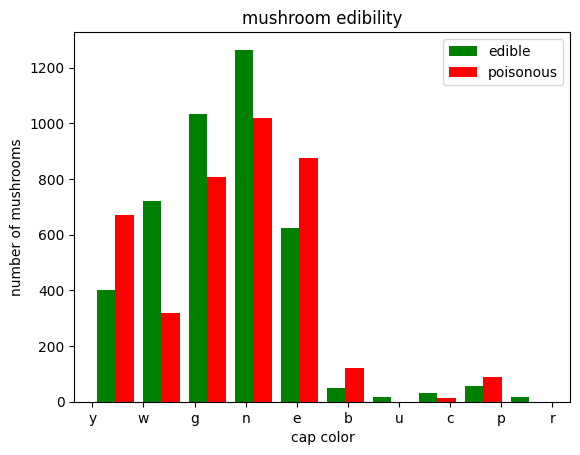

In [19]:
x_plot=df[df["class"]=='e']["cap-color"]
y_plot=df[df["class"]=='p']["cap-color"]

plt.hist([x_plot,y_plot],color=['green','red'],label=['edible','poisonous'])
plt.xlabel("cap color")
plt.ylabel("number of mushrooms")
plt.title("mushroom edibility")
plt.legend()

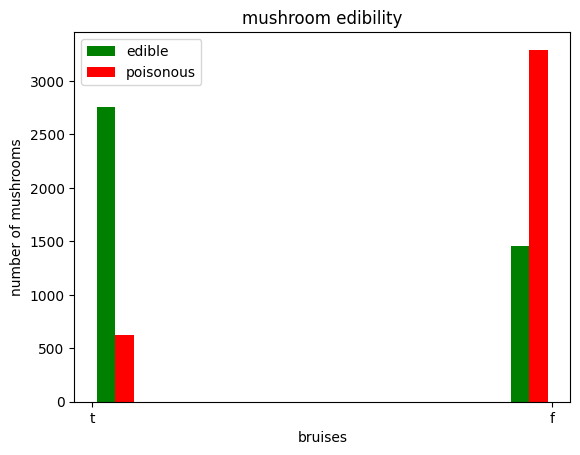

In [20]:
x_plot=df[df["class"]=='e']["bruises"]
y_plot=df[df["class"]=='p']["bruises"]

plt.hist([x_plot,y_plot],color=['green','red'],label=['edible','poisonous'])
plt.xlabel("bruises")
plt.ylabel("number of mushrooms")
plt.title("mushroom edibility")
plt.legend()

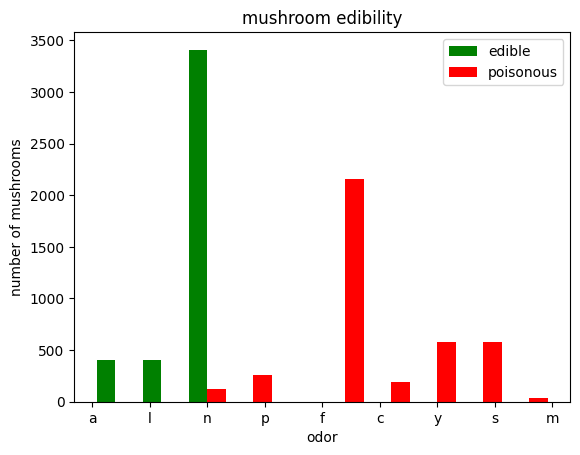

In [21]:
x_plot=df[df["class"]=='e']["odor"]
y_plot=df[df["class"]=='p']["odor"]

plt.hist([x_plot,y_plot],color=['green','red'],label=['edible','poisonous'])
plt.xlabel("odor")
plt.ylabel("number of mushrooms")
plt.title("mushroom edibility")
plt.legend() #odor appears to be a good indicator of edibility

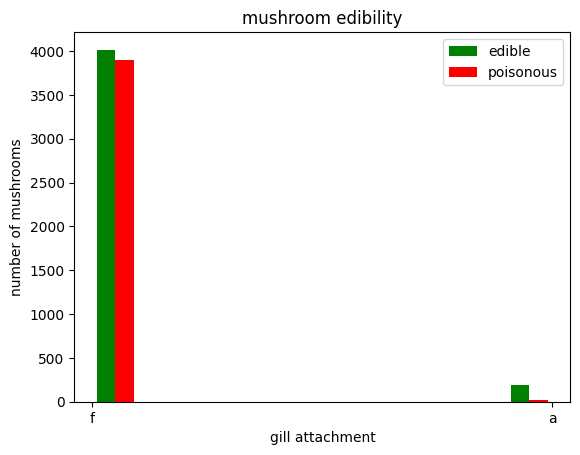

In [22]:
x_plot=df[df["class"]=='e']["gill-attachment"]
y_plot=df[df["class"]=='p']["gill-attachment"]

plt.hist([x_plot,y_plot],color=['green','red'],label=['edible','poisonous'])
plt.xlabel("gill attachment")
plt.ylabel("number of mushrooms")
plt.title("mushroom edibility")
plt.legend()

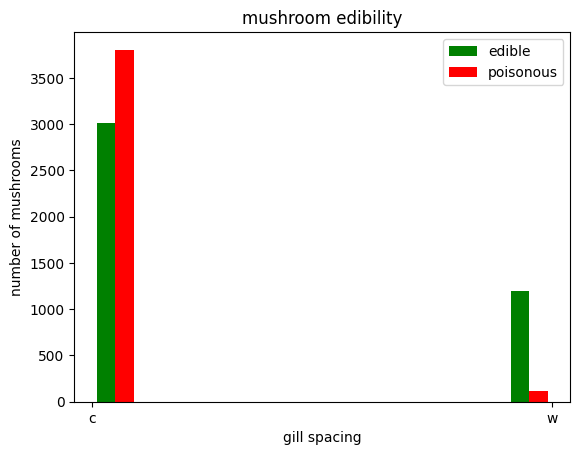

In [23]:
x_plot=df[df["class"]=='e']["gill-spacing"]
y_plot=df[df["class"]=='p']["gill-spacing"]

plt.hist([x_plot,y_plot],color=['green','red'],label=['edible','poisonous'])
plt.xlabel("gill spacing")
plt.ylabel("number of mushrooms")
plt.title("mushroom edibility")
plt.legend()

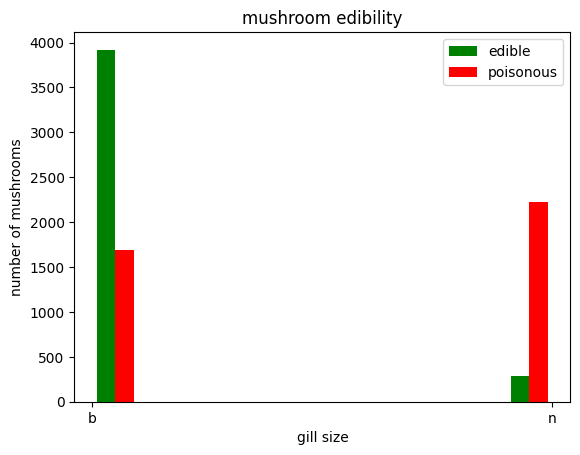

In [24]:
x_plot=df[df["class"]=='e']["gill-size"]
y_plot=df[df["class"]=='p']["gill-size"]

plt.hist([x_plot,y_plot],color=['green','red'],label=['edible','poisonous'])
plt.xlabel("gill size")
plt.ylabel("number of mushrooms")
plt.title("mushroom edibility")
plt.legend()

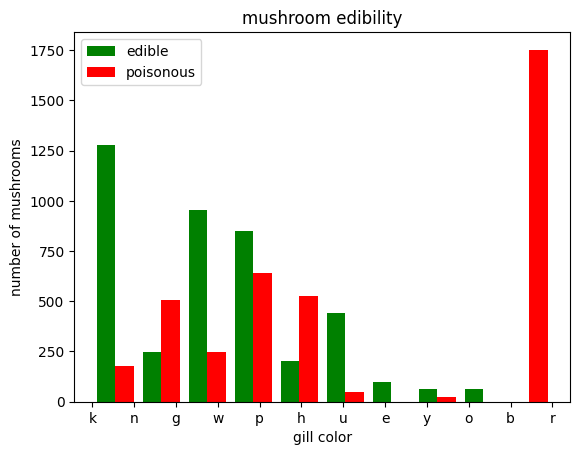

In [25]:
x_plot=df[df["class"]=='e']["gill-color"]
y_plot=df[df["class"]=='p']["gill-color"]

plt.hist([x_plot,y_plot],color=['green','red'],label=['edible','poisonous'])
plt.xlabel("gill color")
plt.ylabel("number of mushrooms")
plt.title("mushroom edibility")
plt.legend()

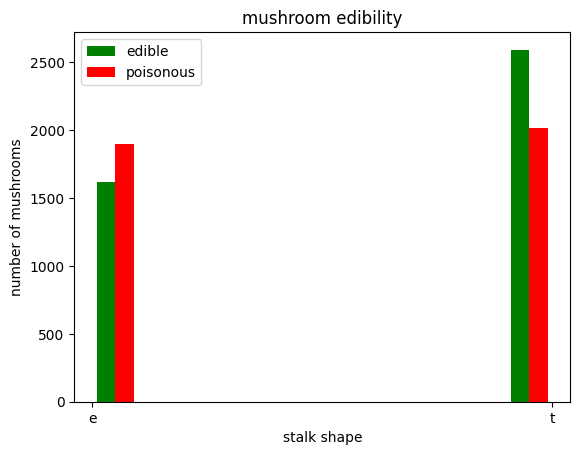

In [26]:
x_plot=df[df["class"]=='e']["stalk-shape"]
y_plot=df[df["class"]=='p']["stalk-shape"]

plt.hist([x_plot,y_plot],color=['green','red'],label=['edible','poisonous'])
plt.xlabel("stalk shape")
plt.ylabel("number of mushrooms")
plt.title("mushroom edibility")
plt.legend()

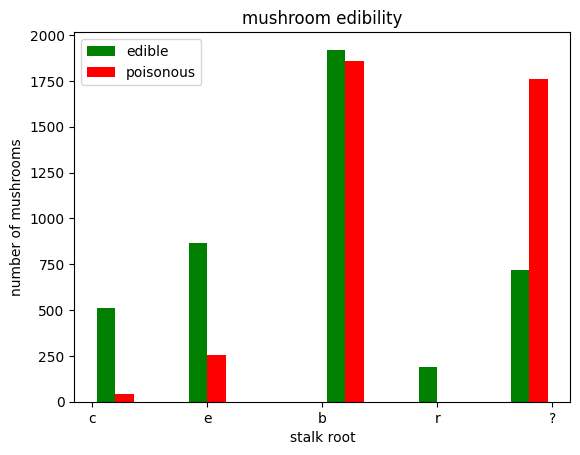

In [27]:
x_plot=df[df["class"]=='e']["stalk-root"]
y_plot=df[df["class"]=='p']["stalk-root"]

plt.hist([x_plot,y_plot],color=['green','red'],label=['edible','poisonous'])
plt.xlabel("stalk root")
plt.ylabel("number of mushrooms")
plt.title("mushroom edibility")
plt.legend()

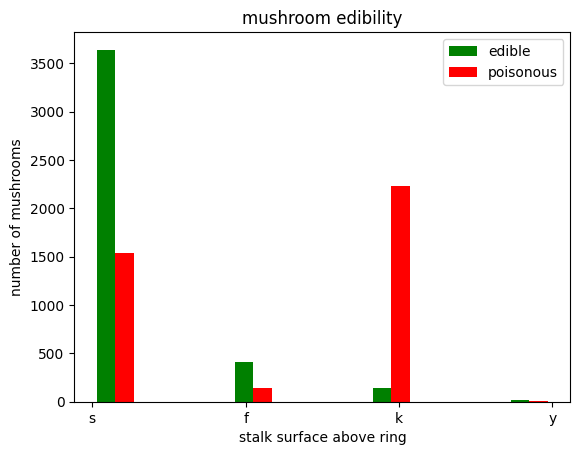

In [28]:
x_plot=df[df["class"]=='e']["stalk-surface-above-ring"]
y_plot=df[df["class"]=='p']["stalk-surface-above-ring"]

plt.hist([x_plot,y_plot],color=['green','red'],label=['edible','poisonous'])
plt.xlabel("stalk surface above ring")
plt.ylabel("number of mushrooms")
plt.title("mushroom edibility")
plt.legend()

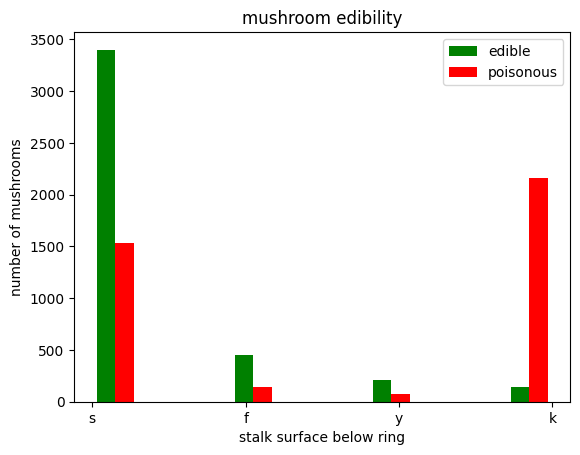

In [29]:
x_plot=df[df["class"]=='e']["stalk-surface-below-ring"]
y_plot=df[df["class"]=='p']["stalk-surface-below-ring"]

plt.hist([x_plot,y_plot],color=['green','red'],label=['edible','poisonous'])
plt.xlabel("stalk surface below ring")
plt.ylabel("number of mushrooms")
plt.title("mushroom edibility")
plt.legend()

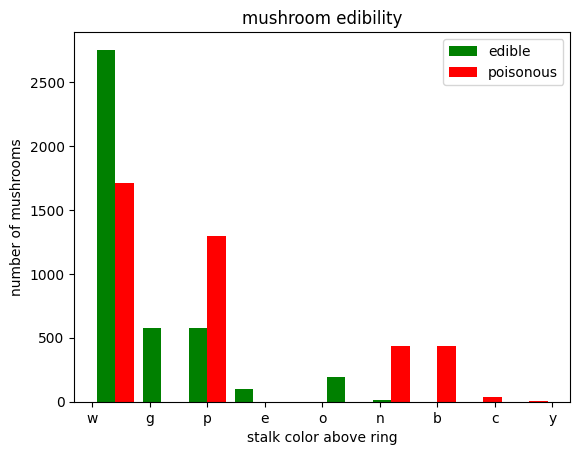

In [30]:
x_plot=df[df["class"]=='e']["stalk-color-above-ring"]
y_plot=df[df["class"]=='p']["stalk-color-above-ring"]

plt.hist([x_plot,y_plot],color=['green','red'],label=['edible','poisonous'])
plt.xlabel("stalk color above ring")
plt.ylabel("number of mushrooms")
plt.title("mushroom edibility")
plt.legend()

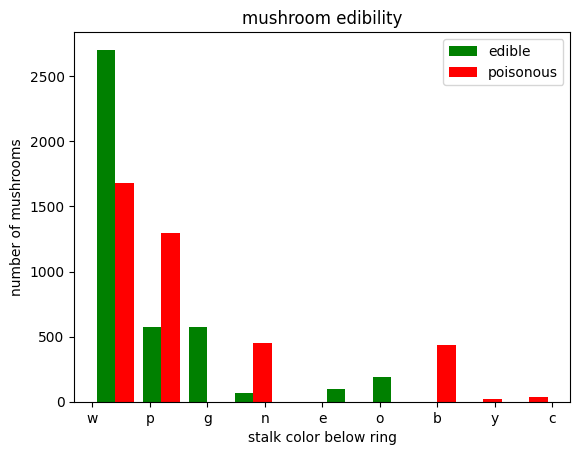

In [31]:
x_plot=df[df["class"]=='e']["stalk-color-below-ring"]
y_plot=df[df["class"]=='p']["stalk-color-below-ring"]

plt.hist([x_plot,y_plot],color=['green','red'],label=['edible','poisonous'])
plt.xlabel("stalk color below ring")
plt.ylabel("number of mushrooms")
plt.title("mushroom edibility")
plt.legend()

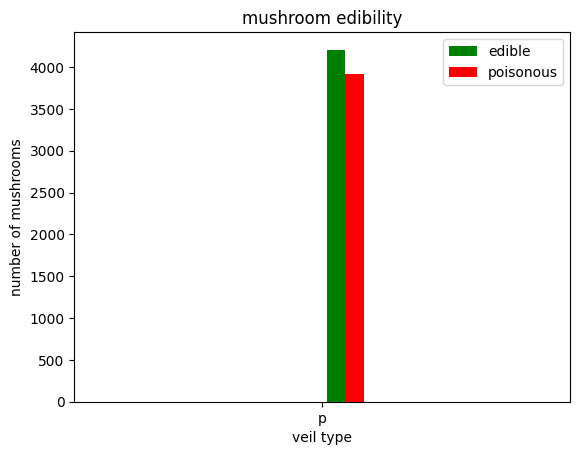

In [32]:
x_plot=df[df["class"]=='e']["veil-type"]
y_plot=df[df["class"]=='p']["veil-type"]

plt.hist([x_plot,y_plot],color=['green','red'],label=['edible','poisonous'])
plt.xlabel("veil type")
plt.ylabel("number of mushrooms")
plt.title("mushroom edibility")
plt.legend()

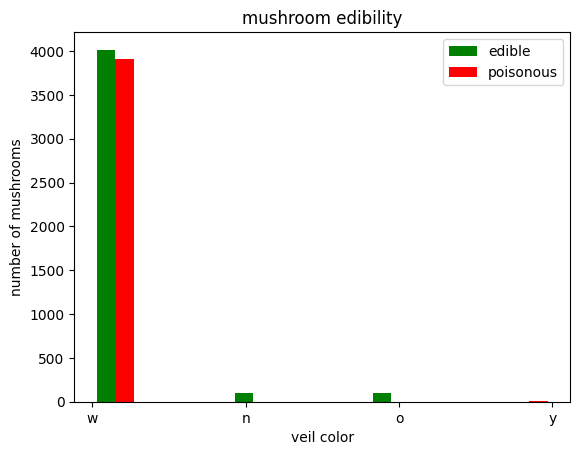

In [33]:
x_plot=df[df["class"]=='e']["veil-color"]
y_plot=df[df["class"]=='p']["veil-color"]

plt.hist([x_plot,y_plot],color=['green','red'],label=['edible','poisonous'])
plt.xlabel("veil color")
plt.ylabel("number of mushrooms")
plt.title("mushroom edibility")
plt.legend()

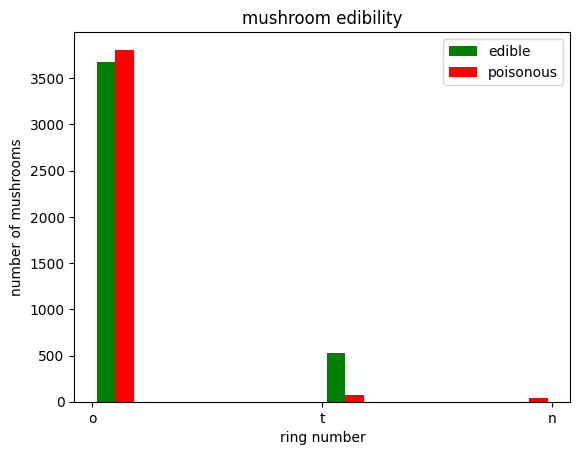

In [34]:
x_plot=df[df["class"]=='e']["ring-number"]
y_plot=df[df["class"]=='p']["ring-number"]

plt.hist([x_plot,y_plot],color=['green','red'],label=['edible','poisonous'])
plt.xlabel("ring number")
plt.ylabel("number of mushrooms")
plt.title("mushroom edibility")
plt.legend()

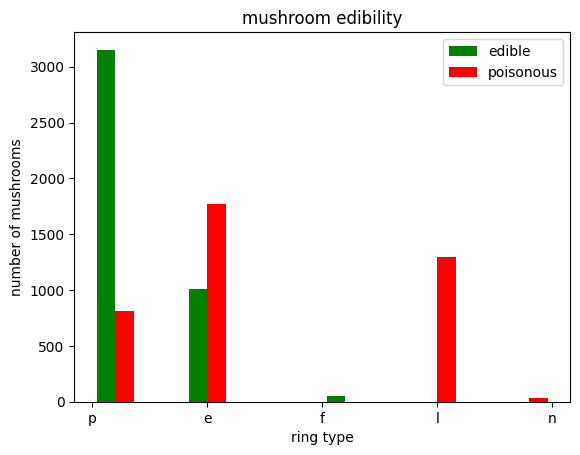

In [35]:
x_plot=df[df["class"]=='e']["ring-type"]
y_plot=df[df["class"]=='p']["ring-type"]

plt.hist([x_plot,y_plot],color=['green','red'],label=['edible','poisonous'])
plt.xlabel("ring type")
plt.ylabel("number of mushrooms")
plt.title("mushroom edibility")
plt.legend()

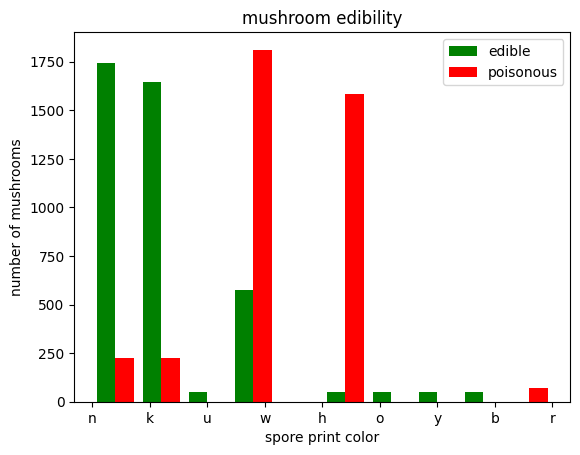

In [36]:
x_plot=df[df["class"]=='e']["spore-print-color"]
y_plot=df[df["class"]=='p']["spore-print-color"]

plt.hist([x_plot,y_plot],color=['green','red'],label=['edible','poisonous'])
plt.xlabel("spore print color")
plt.ylabel("number of mushrooms")
plt.title("mushroom edibility")
plt.legend()

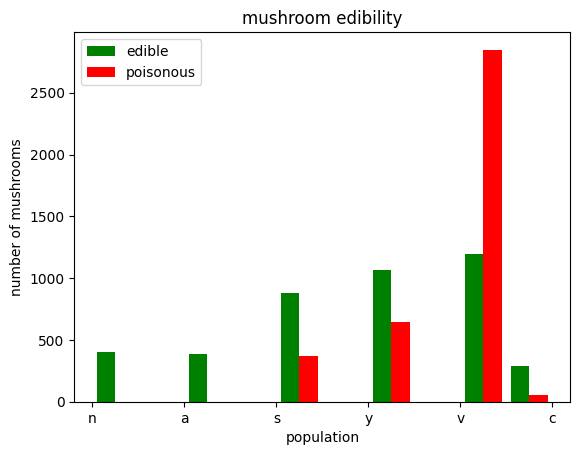

In [37]:
x_plot=df[df["class"]=='e']["population"]
y_plot=df[df["class"]=='p']["population"]

plt.hist([x_plot,y_plot],color=['green','red'],label=['edible','poisonous'])
plt.xlabel("population")
plt.ylabel("number of mushrooms")
plt.title("mushroom edibility")
plt.legend()

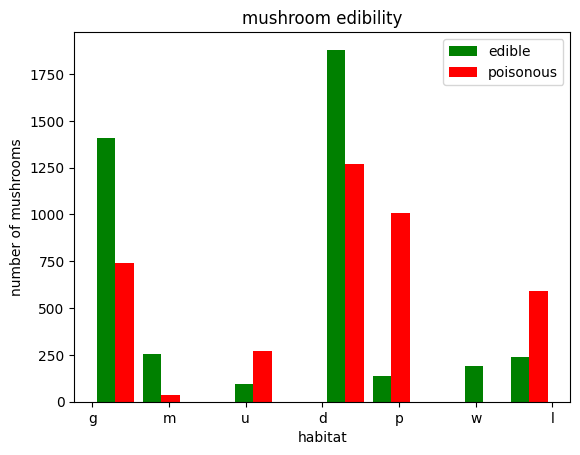

In [38]:
x_plot=df[df["class"]=='e']["habitat"]
y_plot=df[df["class"]=='p']["habitat"]

plt.hist([x_plot,y_plot],color=['green','red'],label=['edible','poisonous'])
plt.xlabel("habitat")
plt.ylabel("number of mushrooms")
plt.title("mushroom edibility")
plt.legend()

In [39]:
X=df3.drop("class", axis='columns')
y=df3["class"]

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [41]:
num_features=X.shape[1]

In [42]:
input_layer=keras.layers.Input(shape=(num_features, ))
hidden_layer=keras.layers.Dense(num_features,activation='relu')(input_layer)
output_layer = keras.layers.Dense(1, activation='sigmoid')(hidden_layer)

model_sgd = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
model_sgd.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy'])

model_sgd.fit(X_train,y_train,epochs=50,validation_data=(X_test, y_test), verbose=1)

Epoch 1/50


C:\Users\karol\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7416 - loss: 0.5645 - val_accuracy: 0.8745 - val_loss: 0.3258
Epoch 2/50
  3/204 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.8229 - loss: 0.4063  

C:\Users\karol\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8817 - loss: 0.3101 - val_accuracy: 0.8818 - val_loss: 0.2861
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8996 - loss: 0.2624 - val_accuracy: 0.9009 - val_loss: 0.2529
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9098 - loss: 0.2385 - val_accuracy: 0.9108 - val_loss: 0.2340
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.9210 - loss: 0.2216 - val_accuracy: 0.9212 - val_loss: 0.2140
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9252 - loss: 0.2046 - val_accuracy: 0.9354 - val_loss: 0.2002
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9314 - loss: 0.1946 - val_accuracy: 0.9403 - val_loss: 0.1836
Epoch 8/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9339 - loss: 0.1838 - val_accuracy: 0.9391 - val_loss: 0.1746
Epoch 9/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9409 - loss: 0.1692 - val_accuracy: 0.9428 - va

In [43]:
input_layer=keras.layers.Input(shape=(num_features, ))
output_layer = keras.layers.Dense(1, activation='sigmoid')(input_layer)

model1 = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
model1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [44]:
training_history=model1.fit(X_train,y_train,epochs=100,validation_data=(X_test, y_test), verbose=1)

Epoch 1/100


C:\Users\karol\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_3']. Received: the structure of inputs=*
  warnings.warn(


204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4731 - loss: 1.7724 - val_accuracy: 0.4800 - val_loss: 0.8923
Epoch 2/100
 54/204 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.4928 - loss: 0.8618

C:\Users\karol\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_3']. Received: the structure of inputs=*
  warnings.warn(


204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5317 - loss: 0.7984 - val_accuracy: 0.7058 - val_loss: 0.5967
Epoch 3/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7466 - loss: 0.5496 - val_accuracy: 0.8080 - val_loss: 0.4767
Epoch 4/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8183 - loss: 0.4693 - val_accuracy: 0.8486 - val_loss: 0.4159
Epoch 5/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8568 - loss: 0.4058 - val_accuracy: 0.8634 - val_loss: 0.3766
Epoch 6/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8715 - loss: 0.3728 - val_accuracy: 0.8714 - val_loss: 0.3472
Epoch 7/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8762 - loss: 0.3386 - val_accuracy: 0.8818 - val_loss: 0.3263
Epoch 8/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8881 - loss: 0.3146 - val_accuracy: 0.8855 - val_loss: 0.3073
Epoch 9/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.8916 - loss: 0.2938 - val_accuracy: 0.88

In [45]:
model1.evaluate(X_test,y_test)

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.9416 - loss: 0.1655


[0.1582745462656021, 0.9483076930046082]

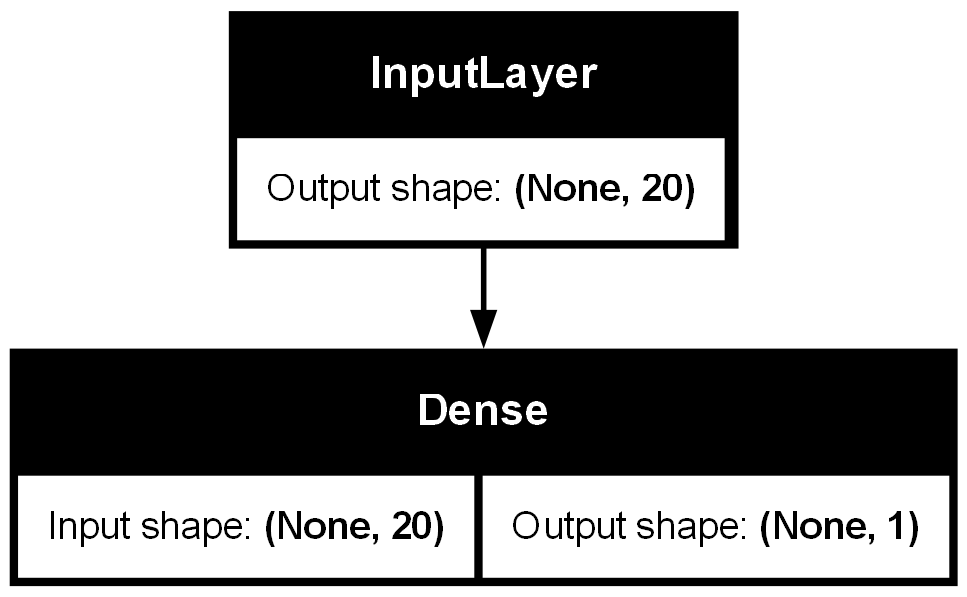

In [46]:
tf.keras.utils.plot_model(model1, show_shapes=True)

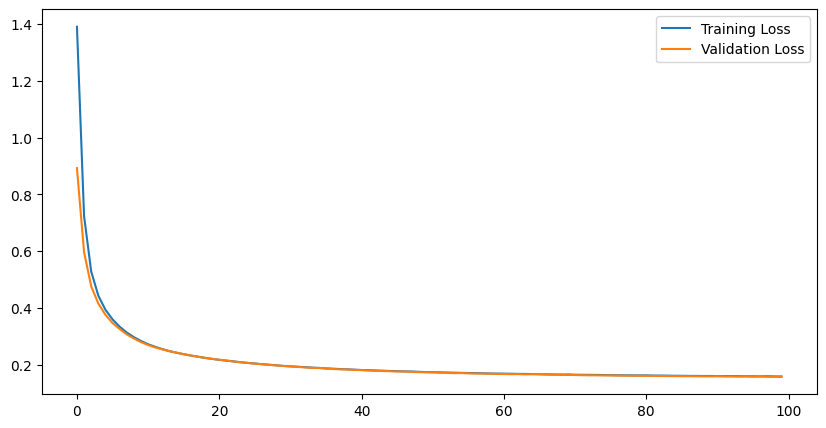

In [47]:
plt.figure(figsize=(10, 5))
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [82]:
input_layer=keras.layers.Input(shape=(num_features, ))
hidden_layer=keras.layers.Dense(num_features,activation='relu')(input_layer)
output_layer = keras.layers.Dense(1, activation='sigmoid')(hidden_layer)

model2 = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
model2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [83]:
training_history=model2.fit(X_train,y_train,epochs=100,validation_data=(X_test, y_test), verbose=1)

Epoch 1/100


C:\Users\karol\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_25']. Received: the structure of inputs=*
  warnings.warn(


204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7328 - loss: 0.5772 - val_accuracy: 0.8628 - val_loss: 0.3270
Epoch 2/100
  2/204 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.7500 - loss: 0.4422  

C:\Users\karol\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_25']. Received: the structure of inputs=*
  warnings.warn(


204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8763 - loss: 0.3006 - val_accuracy: 0.8905 - val_loss: 0.2499
Epoch 3/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8979 - loss: 0.2368 - val_accuracy: 0.9212 - val_loss: 0.1923
Epoch 4/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9269 - loss: 0.1777 - val_accuracy: 0.9434 - val_loss: 0.1535
Epoch 5/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9435 - loss: 0.1443 - val_accuracy: 0.9563 - val_loss: 0.1288
Epoch 6/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9582 - loss: 0.1256 - val_accuracy: 0.9698 - val_loss: 0.1035
Epoch 7/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9711 - loss: 0.0931 - val_accuracy: 0.9760 - val_loss: 0.0891
Epoch 8/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9735 - loss: 0.0862 - val_accuracy: 0.9834 - val_loss: 0.0755
Epoch 9/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9842 - loss: 0.0673 - val_accuracy: 0.9822

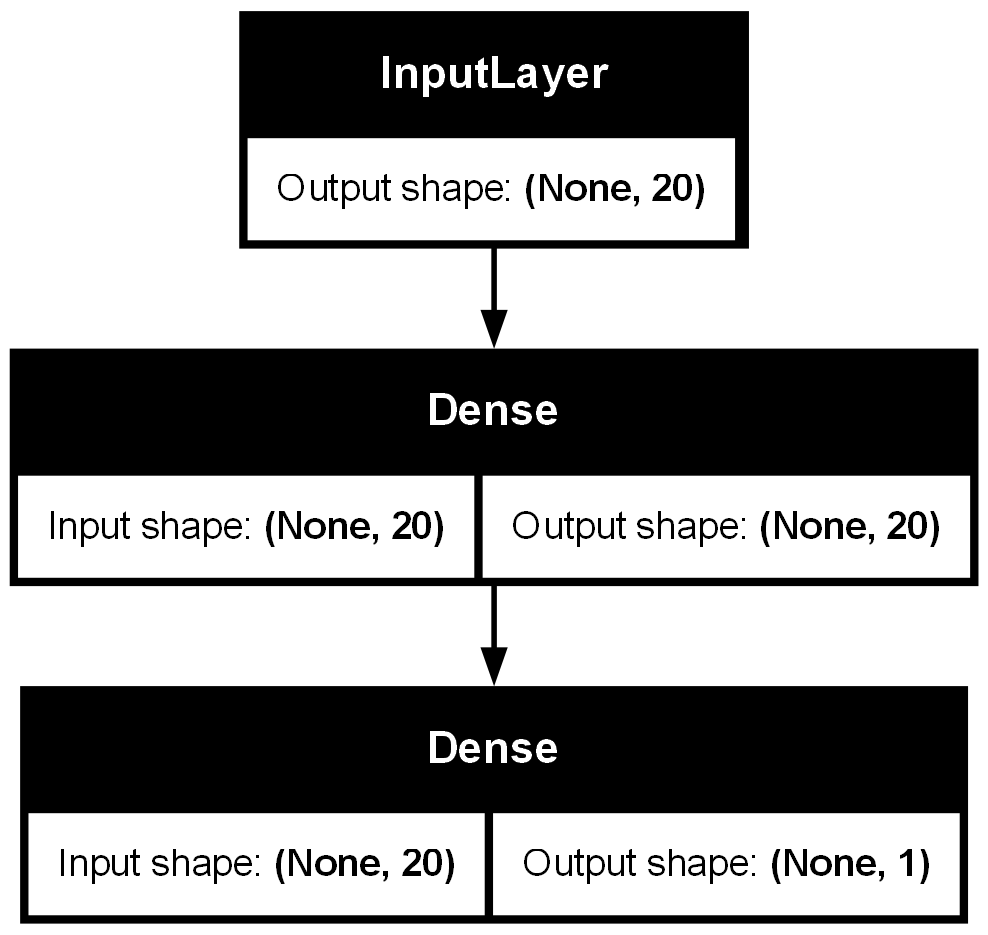

In [84]:
tf.keras.utils.plot_model(model2, show_shapes=True)

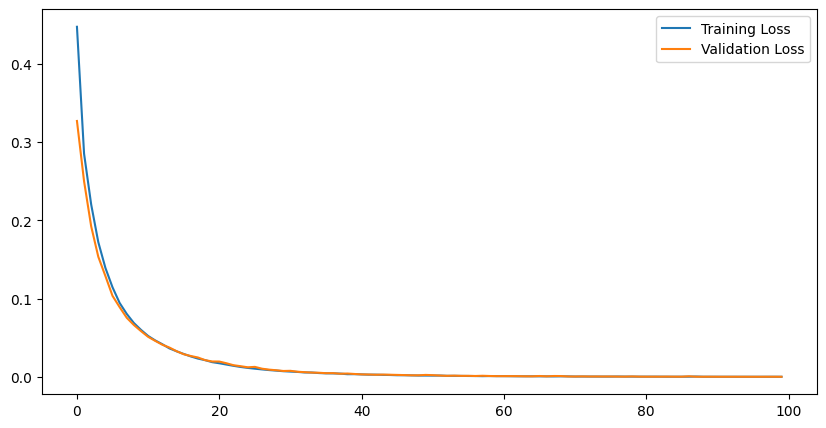

In [85]:
plt.figure(figsize=(10, 5))
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [65]:
input_layer=keras.layers.Input(shape=(num_features, ))
hidden_layer1=keras.layers.Dense(num_features,activation='relu')(input_layer)
hidden_layer2=keras.layers.Dense(50,activation='relu')(hidden_layer1)
output_layer = keras.layers.Dense(1, activation='sigmoid')(hidden_layer2)

model3 = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
model3.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [66]:
training_history=model3.fit(X_train,y_train,epochs=100,validation_data=(X_test, y_test), verbose=1)

Epoch 1/100


C:\Users\karol\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_21']. Received: the structure of inputs=*
  warnings.warn(


204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8020 - loss: 0.4454 - val_accuracy: 0.9095 - val_loss: 0.2442
Epoch 2/100
  3/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9149 - loss: 0.2397 

C:\Users\karol\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_21']. Received: the structure of inputs=*
  warnings.warn(


204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9253 - loss: 0.1958 - val_accuracy: 0.9502 - val_loss: 0.1317
Epoch 3/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9588 - loss: 0.1069 - val_accuracy: 0.9797 - val_loss: 0.0879
Epoch 4/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9799 - loss: 0.0713 - val_accuracy: 0.9877 - val_loss: 0.0594
Epoch 5/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9853 - loss: 0.0569 - val_accuracy: 0.9895 - val_loss: 0.0409
Epoch 6/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9924 - loss: 0.0345 - val_accuracy: 0.9914 - val_loss: 0.0335
Epoch 7/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9930 - loss: 0.0290 - val_accuracy: 0.9963 - val_loss: 0.0238
Epoch 8/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9937 - loss: 0.0218 - val_accuracy: 0.9982 - val_loss: 0.0155
Epoch 9/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9963 - loss: 0.0163 - val_accuracy: 0.9988

In [54]:
model3.evaluate(X_test,y_test)

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 1.0000 - loss: 1.0243e-05


[1.2252007763891015e-05, 1.0]

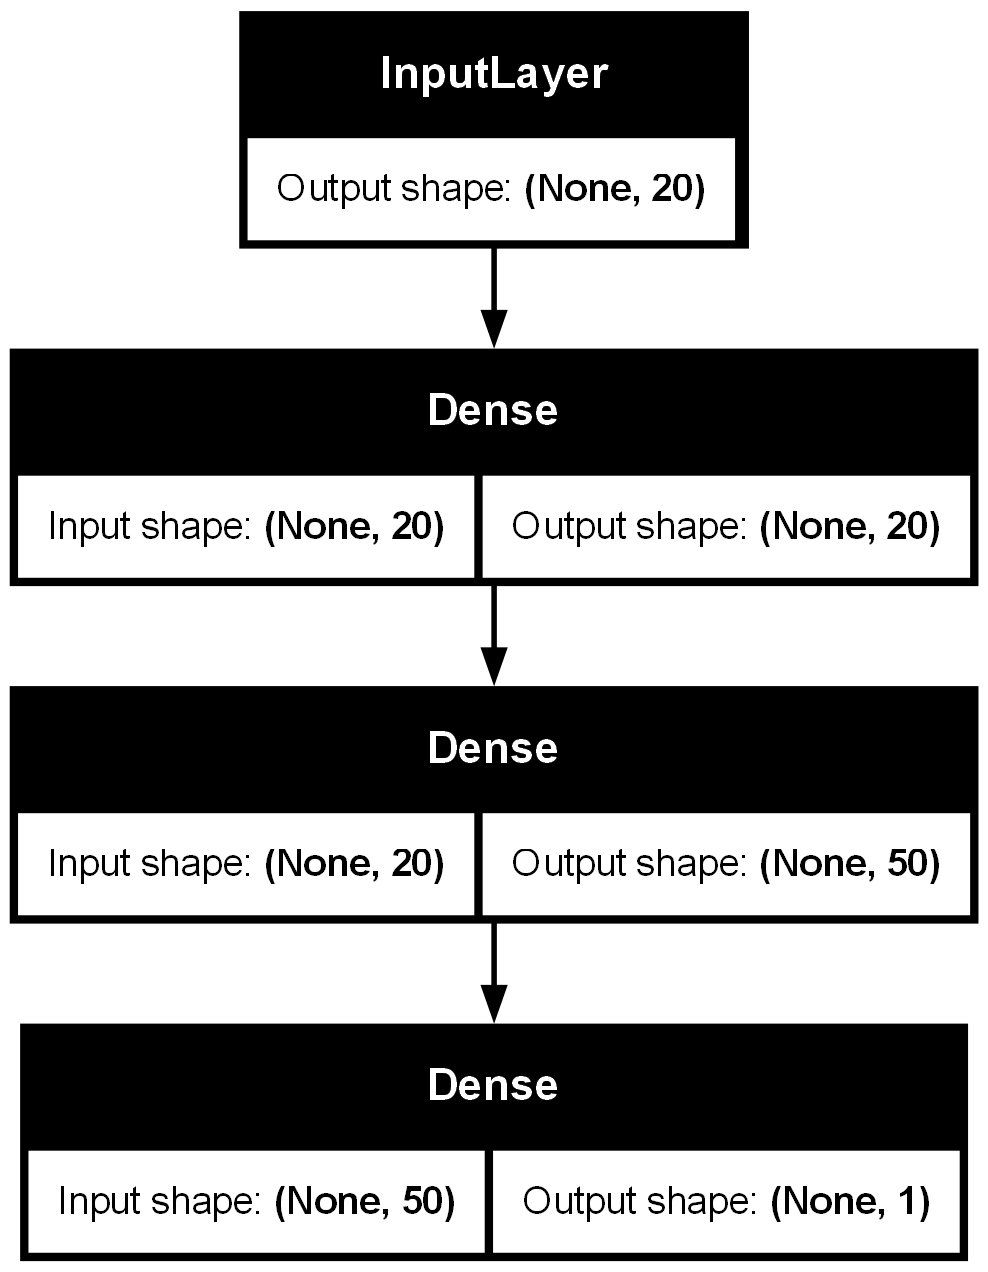

In [55]:
tf.keras.utils.plot_model(model3, show_shapes=True)

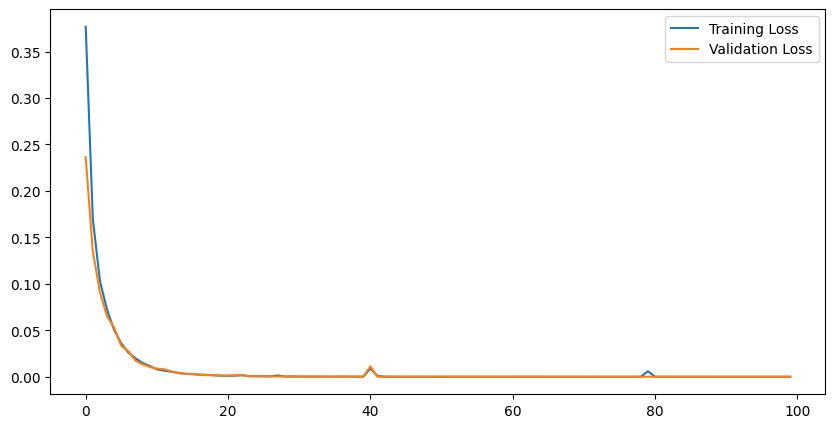

In [63]:
plt.figure(figsize=(10, 5))
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

Model 3 was chosen as the final oen as it performs very well

Chosen network:
2 hidden layers, activation function: ReLU - a popular, simple, easy
to calculate function. It also helps solve the vanishing gradient
problem. Compared to a network with one hidden layer, this network
achieves smaller training and validation loss more quickly.
Output layer activation function: Sigmoid - this function is
appropriate for binary classification problems and works well for this
dataset.
Loss function: Binary crossentropy - well-suited to binary
classification problems.
Optimizer: Adam - compared to other tested optimziers available in
Keras (SGD, Adagrad, Adadelta, RMSprop) it achieves better results
for accuracy and loss in fewer epochs

In [67]:
y_pred=model3.predict(X_test)

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\karol\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_21']. Received: the structure of inputs=*
  warnings.warn(


In [80]:
y_pred=y_pred.round()

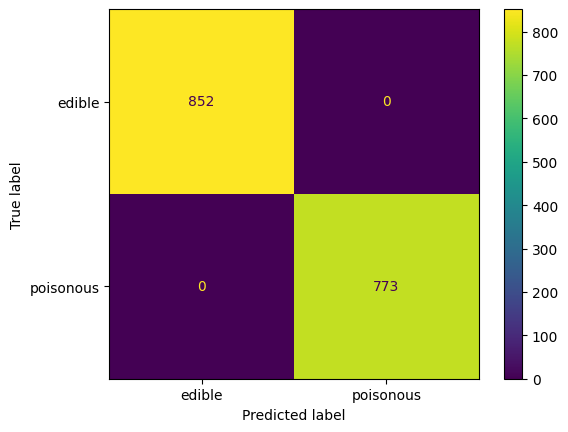

In [81]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["edible", "poisonous"])
cm_display.plot()
plt.show() 


In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["edible","poisonous"]))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       852
   poisonous       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [57]:
input_layer=keras.layers.Input(shape=(num_features, ))
hidden_layer1=keras.layers.Dense(num_features,activation='relu')(input_layer)
hidden_layer2=keras.layers.Dense(50,activation='relu')(hidden_layer1)
dropout_layer=keras.layers.Dropout(0.5)(hidden_layer2)
output_layer = keras.layers.Dense(1, activation='sigmoid')(dropout_layer)

model4 = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
model4.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [58]:
training_history=model4.fit(X_train,y_train,epochs=100,validation_data=(X_test, y_test), verbose=1)

Epoch 1/100


C:\Users\karol\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_12']. Received: the structure of inputs=*
  warnings.warn(


204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6931 - loss: 0.6254 - val_accuracy: 0.8782 - val_loss: 0.2793
Epoch 2/100
  2/204 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.8125 - loss: 0.3181  

C:\Users\karol\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_12']. Received: the structure of inputs=*
  warnings.warn(


204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8777 - loss: 0.2954 - val_accuracy: 0.9120 - val_loss: 0.1863
Epoch 3/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9229 - loss: 0.1891 - val_accuracy: 0.9680 - val_loss: 0.1182
Epoch 4/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9481 - loss: 0.1367 - val_accuracy: 0.9772 - val_loss: 0.0753
Epoch 5/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9649 - loss: 0.0996 - val_accuracy: 0.9828 - val_loss: 0.0532
Epoch 6/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9772 - loss: 0.0683 - val_accuracy: 0.9877 - val_loss: 0.0389
Epoch 7/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9830 - loss: 0.0606 - val_accuracy: 0.9840 - val_loss: 0.0370
Epoch 8/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9858 - loss: 0.0436 - val_accuracy: 0.9926 - val_loss: 0.0245
Epoch 9/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9908 - loss: 0.0332 - val_accuracy: 0.9945

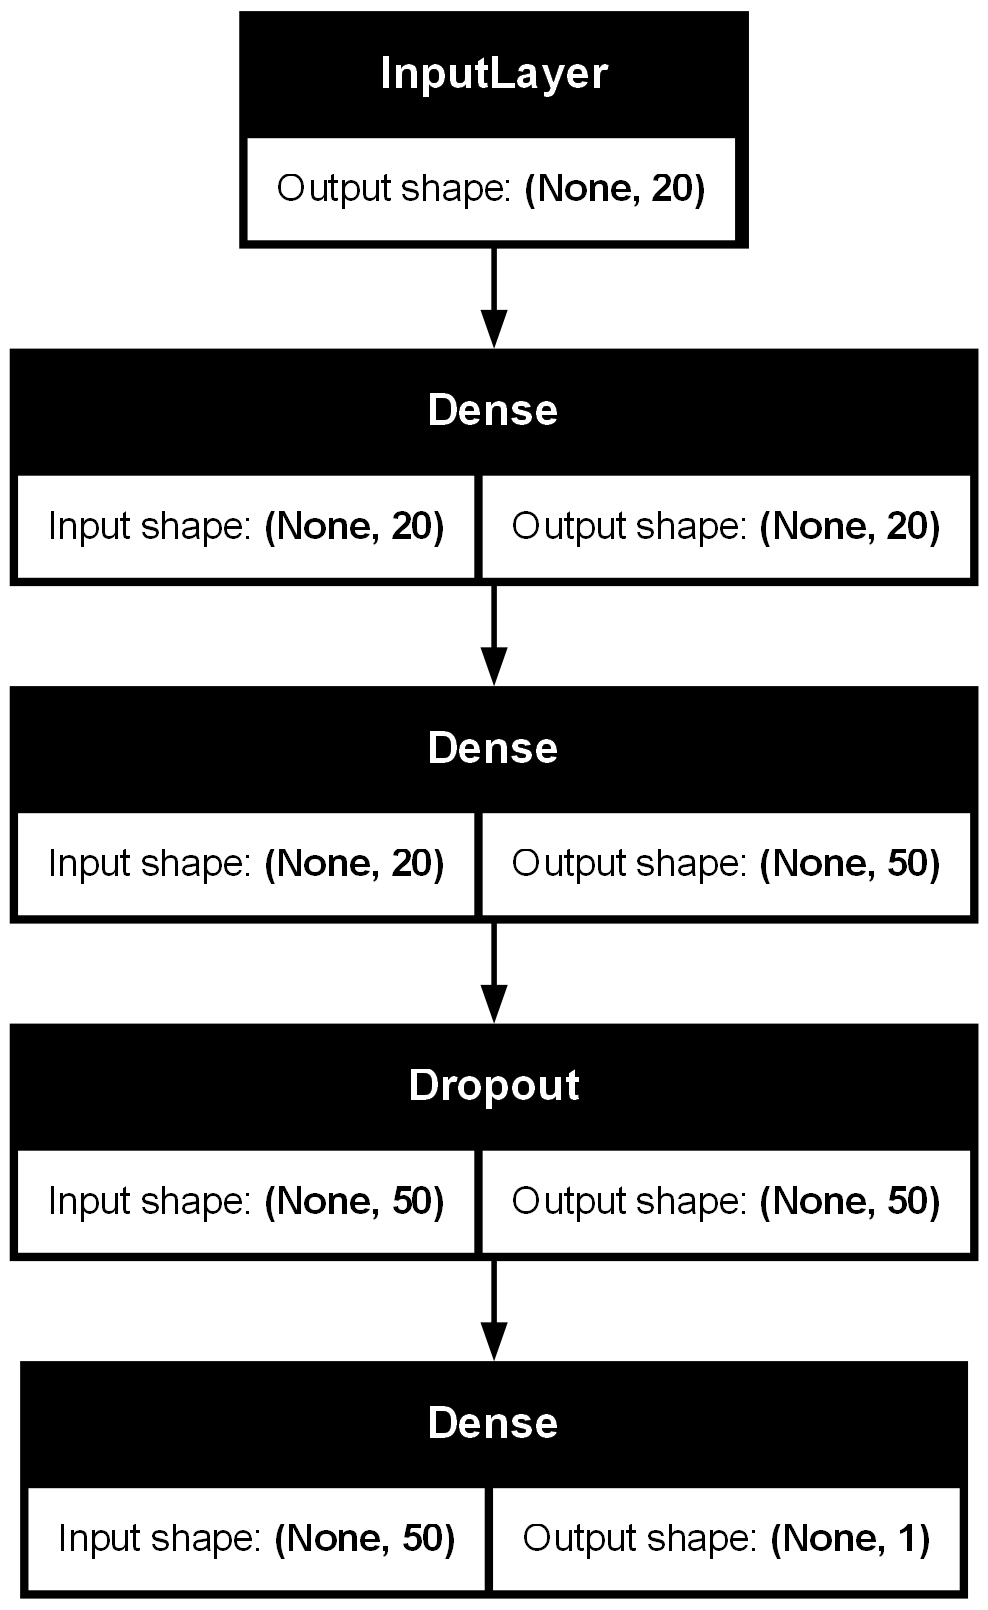

In [59]:
tf.keras.utils.plot_model(model4, show_shapes=True)

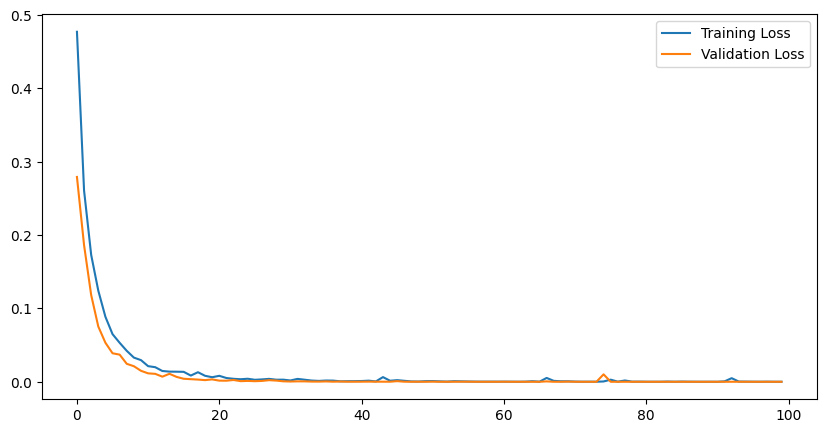

In [60]:
plt.figure(figsize=(10, 5))
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()